# Classification Model: Mortgage Default Risk 
### By Stephanie Solis

## Part 0: Exploratory Data Analysis
### 0.1 Creating Dataframes, Exploring Data

In [1]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
#Load default_risk into dataframe
df_train = pd.read_csv('data/default_risk.csv')
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#load bureau data into dataframe
df_CB = pd.read_csv('data/bureau.csv')
df_CB.head() 

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [4]:
#explore values of credit_active column
df_CB.CREDIT_ACTIVE.unique()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

In [5]:
#load bureau_balance into df
df_CB_Bal = pd.read_csv('data/bureau_balance.csv')
df_CB_Bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [6]:
#explore values of "status"
df_CB_Bal.STATUS.unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

In [7]:
#load previous application data into df
df_PrevApp = pd.read_csv('data/previous_application.csv')
df_PrevApp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#explore values of name_contract_type
df_PrevApp.NAME_CONTRACT_TYPE.unique()

array(['Consumer loans', 'Cash loans', 'Revolving loans', 'XNA'],
      dtype=object)

In [9]:
#explore reasons for previous app rejections
df_PrevApp.CODE_REJECT_REASON.unique()

array(['XAP', 'HC', 'LIMIT', 'CLIENT', 'SCOFR', 'SCO', 'XNA', 'VERIF',
       'SYSTEM'], dtype=object)

In [10]:
#load cash balance table into df
df_POS = pd.read_csv('data/POS_CASH_balance.csv')
df_POS.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [11]:
#explore name_contract_status
df_POS.NAME_CONTRACT_STATUS.unique()

array(['Active', 'Completed', 'Signed', 'Approved',
       'Returned to the store', 'Demand', 'Canceled', 'XNA',
       'Amortized debt'], dtype=object)

In [12]:
#explore installment future count
df_POS.CNT_INSTALMENT_FUTURE.unique()

array([45., 35.,  9., 42., 12., 43., 36., 16., 24.,  5., 15.,  1., 28.,
       23., 56., 11.,  7., 18., 17., 46., 21.,  0.,  4., 40., 32., 19.,
        8., 10.,  2., 13., 14.,  3.,  6., 48., 22., 34., 47., 30., 29.,
       41., 54., 20., 37., 31., 27., 26., nan, 25., 38., 33., 39., 53.,
       58., 50., 51., 52., 55., 59., 57., 60., 49., 44., 61., 68., 66.,
       70., 69., 64., 62., 63., 67., 85., 65., 80., 72., 82., 71., 83.,
       81., 84.])

In [13]:
#load installments_payments into df
df_Pmnts = pd.read_csv('data/installments_payments.csv')
df_Pmnts.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [14]:
#load credit_card_balance into df
df_CCBal = pd.read_csv('data/credit_card_balance.csv')
df_CCBal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


### 0.2 Feature Selection for Basic Decision Tree
Prior to feature engineering, I will hypothesize the top 10 features and select these for a basic decision tree.
For my top ten variables, I will be selecting the below features for the following reasons:
1. application_{train|test}.csv: CODE_GENDER. Although Gender should not play a factor in a borrower's default risk, I would like to see if there is any bias in the data. This could reflect unfair lending practices or underlying societal biases.
2. application_{train|test}.csv: FLAG_OWN_CAR. If the applicant owns a car, this may imply that they have a higher creditworthiness.
3. application_{train|test}.csv: FLAG_OWN_REALTY. If the applicant owns real estate, this may imply more strongly if they have a higher creditworthiness.
4. application_{train|test}.csv: AMT_INCOME_TOTAL. I hypothesize the higher the income of the borrower, the less likely they are to default on a loan.
5. application_{train|test}.csv: AMT_CREDIT. I hypothesize the higher the loan amount (especially compared with the total income), the more likely they are to default on a loan.
6. application_{train|test}.csv: DAYS_EMPLOYED. The days employed can point to how reliable the appliant's employment and income are. I hypothesize the longer the employment, the lower the risk of defaulting on a loan.
7. bureau.csv: CREDIT_ACTIVE. This variable includes whether an applicant has "bad debt", which may be a good indicator of future defaults.
8. bureau.csv: AMT_CREDIT_SUM_DEBT. Using this variable paired with the applicant's income, the Debt-to-Income ratio (DTI) can be calculated for the borrower--an indicator that many lenders use in application processing.
9. bureau.csv: AMT_CREDIT_SUM_LIMIT. Using this variable paired with the previous variable can show what percentage the applicant is using of their total available credit.
10. bureau.csv: AMT_CREDIT_SUM_OVERDUE. I hypothesize that this variable will be very helpful in determining whether someone is at risk for a default. If they have credit that is overdue, they are not paying their current debts and may not be able to pay future debts.

### 0.3 Plotting Features

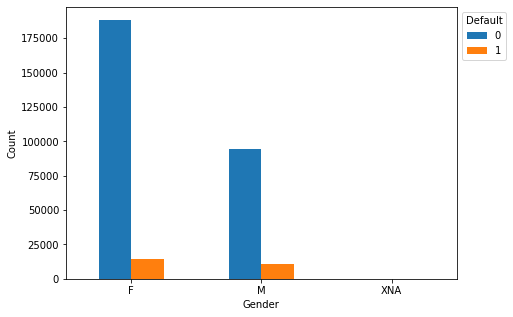

In [15]:
df_gender = df_train.groupby(["CODE_GENDER"]).TARGET.value_counts().unstack()

plt_gender = df_gender.plot(kind='bar', figsize=(7, 5), xlabel='Gender', ylabel='Count', rot=0)
plt_gender.legend(title='Default', bbox_to_anchor=(1, 1), loc='upper left')

In [16]:
#df_gender['Default Rate'] = df_gender['1']/(df_gender['0'] + df_gender['1'])
df_gender.head()

TARGET,0,1
CODE_GENDER,,
F,188278.0,14170.0
M,94404.0,10655.0
XNA,4.0,NaN


### 0.4 Feature Engineering & Dataframe Creation

In [17]:
df_toptenplus = df_train.drop(df_train.columns.difference(['SK_ID_CURR','TARGET', 'NAME_CONTRACT_TYPE',
                                                           'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                                                           'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 
                                                           'DAYS_EMPLOYED', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                                                           'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                                                           'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
                                                           'AMT_REQ_CREDIT_BUREAU_YEAR']), 1)
df_toptenplus.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,-637,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,-1188,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,-225,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,-3039,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,-3038,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

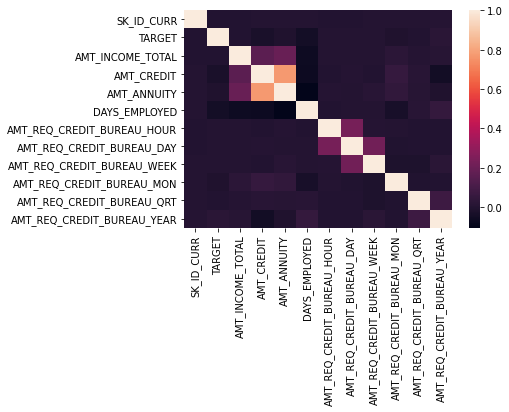

In [18]:
cor_tab = df_toptenplus.select_dtypes('number').corr()
sns.heatmap(cor_tab)

In [19]:
df_topten = df_toptenplus.drop([ 'NAME_CONTRACT_TYPE','AMT_ANNUITY','AMT_REQ_CREDIT_BUREAU_HOUR',
                                                           'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                                                           'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
                                                           'AMT_REQ_CREDIT_BUREAU_YEAR'], axis=1)
df_topten.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_EMPLOYED
0,100002,1,M,N,Y,202500.0,406597.5,-637
1,100003,0,F,N,N,270000.0,1293502.5,-1188
2,100004,0,M,Y,Y,67500.0,135000.0,-225
3,100006,0,F,N,Y,135000.0,312682.5,-3039
4,100007,0,M,N,Y,121500.0,513000.0,-3038


In [20]:
#create a lookup table for ID and target, for use in the future variables
df_ID_Target = df_train.drop(df_train.columns.difference(['SK_ID_CURR','TARGET']), 1)
df_ID_Target.head()

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
3,100006,0
4,100007,0


In [21]:
df_BadDebt=df_CB.loc[df_CB['CREDIT_ACTIVE']=='Bad debt']
df_BadDebt.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
7778,436084,5723864,Bad debt,currency 1,-986,0,NaN,NaN,184500.000,0,184500.00,0.000,0.000,0.0,Credit card,-22,NaN
30959,396333,5801236,Bad debt,currency 1,-2627,0,-1529.0,-1502.0,127866.915,0,225000.00,115349.715,-25349.715,0.0,Credit card,-1502,NaN
69946,386859,5246470,Bad debt,currency 1,-2386,26,-2296.0,NaN,53532.000,1,58059.00,NaN,NaN,53532.0,Consumer credit,-2296,NaN
295159,231185,5173404,Bad debt,currency 1,-2740,1761,-2558.0,NaN,2137.500,0,14296.50,7717.500,0.000,7717.5,Consumer credit,-888,NaN
544624,446651,6439586,Bad debt,currency 1,-2830,0,-2434.0,-1781.0,21741.615,0,58567.68,0.000,0.000,0.0,Consumer credit,-1781,NaN


In [22]:
df_ID_Target['HAS_BAD_DEBT'] = False
#in df_BadDebt.SK_ID_CURR.unique()
df_ID_Target.head()

,SK_ID_CURR,TARGET,HAS_BAD_DEBT
0,100002,1,False
1,100003,0,False
2,100004,0,False
3,100006,0,False
4,100007,0,False


In [23]:
df_ID_Target['HAS_BAD_DEBT'] = df_ID_Target.SK_ID_CURR.isin(df_BadDebt.SK_ID_CURR)
#df_ID_Target.loc[df_ID_Target["SK_ID_CURR"] in df_BadDebt['SK_ID_CURR']]
df_ID_Target.head()

,SK_ID_CURR,TARGET,HAS_BAD_DEBT
0,100002,1,False
1,100003,0,False
2,100004,0,False
3,100006,0,False
4,100007,0,False


In [24]:
df_ID_Target.HAS_BAD_DEBT.value_counts()

False    307491
True         20
Name: HAS_BAD_DEBT, dtype: int64

In [25]:
#will skip bad debt, since there are only 20 occurrences

In [26]:
#check overdue debts
df_overdue = df_CB.drop(df_CB.columns.difference(['SK_ID_CURR','AMT_CREDIT_SUM_OVERDUE']), 1)
df_overdue.head()

,SK_ID_CURR,AMT_CREDIT_SUM_OVERDUE
0,215354,0.0
1,215354,0.0
2,215354,0.0
3,215354,0.0
4,215354,0.0


In [27]:
#remove null debts
df_overdue.dropna(inplace=True)
df_overdue.head()

,SK_ID_CURR,AMT_CREDIT_SUM_OVERDUE
0,215354,0.0
1,215354,0.0
2,215354,0.0
3,215354,0.0
4,215354,0.0


In [28]:
#remove 0 debts
df_overdue = df_overdue.loc[(df_overdue['AMT_CREDIT_SUM_OVERDUE'] != 0)]
df_overdue.head()

,SK_ID_CURR,AMT_CREDIT_SUM_OVERDUE
365,282297,231.525
785,408647,288.000
936,380677,58.500
1575,218135,504.000
1791,229323,169582.500


In [29]:
#add overdue debt flag to the target table
df_ID_Target['HAS_OVERDUE_DEBT'] = df_ID_Target.SK_ID_CURR.isin(df_overdue.SK_ID_CURR)

df_ID_Target.head()
df_ID_Target.HAS_OVERDUE_DEBT.value_counts()

False    304177
True       3334
Name: HAS_OVERDUE_DEBT, dtype: int64

In [30]:
#add overdue debt to top ten features table
df_topten['HAS_OVERDUE_DEBT'] = df_topten.SK_ID_CURR.isin(df_overdue.SK_ID_CURR)
df_topten.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_EMPLOYED,HAS_OVERDUE_DEBT
0,100002,1,M,N,Y,202500.0,406597.5,-637,False
1,100003,0,F,N,N,270000.0,1293502.5,-1188,False
2,100004,0,M,Y,Y,67500.0,135000.0,-225,False
3,100006,0,F,N,Y,135000.0,312682.5,-3039,False
4,100007,0,M,N,Y,121500.0,513000.0,-3038,False


In [31]:
# df_bad = df_ID_Target.groupby(["HAS_OVERDUE_DEBT"]).TARGET.value_counts().unstack()

In [32]:
#check the sum of debts, credit limits, and overdue debt
#debt, limit, overdue
df_DLO = df_CB.drop(df_CB.columns.difference(['SK_ID_CURR','CREDIT_ACTIVE', 'AMT_CREDIT_SUM_DEBT',
                                                           'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE']), 1)
df_DLO.head()

,SK_ID_CURR,CREDIT_ACTIVE,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE
0,215354,Closed,0.0,NaN,0.0
1,215354,Active,171342.0,NaN,0.0
2,215354,Active,NaN,NaN,0.0
3,215354,Active,NaN,NaN,0.0
4,215354,Active,NaN,NaN,0.0


In [33]:
#drop credit that is closed
df_DLO = df_DLO[df_DLO.CREDIT_ACTIVE != 'Closed']
df_DLO.head()

,SK_ID_CURR,CREDIT_ACTIVE,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE
1,215354,Active,171342.00,NaN,0.0
2,215354,Active,NaN,NaN,0.0
3,215354,Active,NaN,NaN,0.0
4,215354,Active,NaN,NaN,0.0
5,215354,Active,71017.38,108982.62,0.0


In [34]:
# sum the credit bureau debts by ID
df_SumCB = df_DLO.groupby(['SK_ID_CURR']).sum()
df_SumCB.head()

,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE
SK_ID_CURR,,,
100001,596686.5,0.000,0.0
100002,245781.0,31988.565,0.0
100003,0.0,810000.000,0.0
100005,568408.5,0.000,0.0
100008,240057.0,0.000,0.0


In [35]:
#add credit debt/limit/overdue amounts to the top ten table
df_topten = df_topten.merge(df_SumCB, on="SK_ID_CURR")
df_topten.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_EMPLOYED,HAS_OVERDUE_DEBT,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE
0,100002,1,M,N,Y,202500.0,406597.5,-637,False,245781.0,31988.565,0.0
1,100003,0,F,N,N,270000.0,1293502.5,-1188,False,0.0,810000.000,0.0
2,100008,0,M,N,Y,99000.0,490495.5,-1588,False,240057.0,0.000,0.0
3,100009,0,F,Y,Y,171000.0,1560726.0,-3130,False,1077349.5,0.000,0.0
4,100010,0,M,Y,Y,360000.0,1530000.0,-449,False,348007.5,0.000,0.0


<AxesSubplot:>

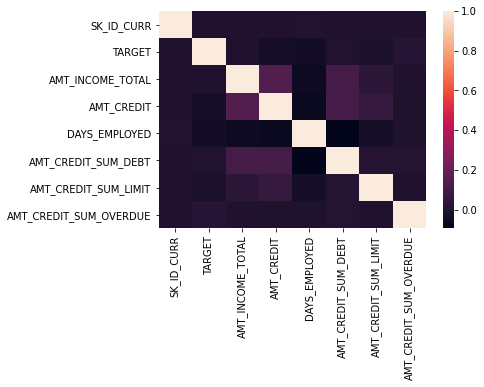

In [36]:
#check heatmap progress
cor_tab = df_topten.select_dtypes('number').corr()
sns.heatmap(cor_tab)

In [37]:
# create dataframes for future feature engineering
# merge these new features with the full set of data for later
#first, create a temp of the df_topten with the duplicate columns removed
df_topten_temp = df_topten.drop(df_topten.columns.difference(['SK_ID_CURR',
                                                              'HAS_OVERDUE_DEBT', 
                                                              'AMT_CREDIT_SUM_DEBT',
                                                              'AMT_CREDIT_SUM_LIMIT',
                                                              'AMT_CREDIT_SUM_OVERDUE']), 1)

#now merge df_train with the temp dataframe, making train the complete set 
# of features being considered 
df_train = df_train.merge(df_topten_temp.set_index('SK_ID_CURR'), on="SK_ID_CURR")
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,HAS_OVERDUE_DEBT,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,False,245781.0,31988.565,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,810000.000,0.0
2,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,1.0,1.0,False,240057.0,0.000,0.0
3,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0.0,0.0,0.0,1.0,1.0,2.0,False,1077349.5,0.000,0.0
4,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,348007.5,0.000,0.0


In [38]:
df_topten.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_EMPLOYED,HAS_OVERDUE_DEBT,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE
0,100002,1,M,N,Y,202500.0,406597.5,-637,False,245781.0,31988.565,0.0
1,100003,0,F,N,N,270000.0,1293502.5,-1188,False,0.0,810000.000,0.0
2,100008,0,M,N,Y,99000.0,490495.5,-1588,False,240057.0,0.000,0.0
3,100009,0,F,Y,Y,171000.0,1560726.0,-3130,False,1077349.5,0.000,0.0
4,100010,0,M,Y,Y,360000.0,1530000.0,-449,False,348007.5,0.000,0.0


In [39]:
#need to one-hot encode columns
df_topten["FEMALE"] = df_topten.CODE_GENDER
df_topten_e = pd.get_dummies(df_topten, columns=['CODE_GENDER',
                                                 'FLAG_OWN_CAR',
                                                'FLAG_OWN_REALTY'], 
                             prefix=['GENDER','CAR', 'REALTY'])
df_topten_e.head()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_EMPLOYED,HAS_OVERDUE_DEBT,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,FEMALE,GENDER_F,GENDER_M,GENDER_XNA,CAR_N,CAR_Y,REALTY_N,REALTY_Y
0,100002,1,202500.0,406597.5,-637,False,245781.0,31988.565,0.0,M,0,1,0,1,0,0,1
1,100003,0,270000.0,1293502.5,-1188,False,0.0,810000.000,0.0,F,1,0,0,1,0,1,0
2,100008,0,99000.0,490495.5,-1588,False,240057.0,0.000,0.0,M,0,1,0,1,0,0,1
3,100009,0,171000.0,1560726.0,-3130,False,1077349.5,0.000,0.0,F,1,0,0,0,1,0,1
4,100010,0,360000.0,1530000.0,-449,False,348007.5,0.000,0.0,M,0,1,0,0,1,0,1


In [40]:
df_train_e = pd.get_dummies(df_train)
df_train_e.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,0,0,0,0,0,0,0,0,0,0
3,100009,0,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,...,0,0,0,0,0,0,0,0,0,0
4,100010,0,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,...,0,0,0,0,0,0,0,0,0,0


Note the below dataframes for reference:
- df_topten_e: Top Ten Variables  with one-hot encoding
    - Columns: 'SK_ID_CURR', 'TARGET', 'GENDER_F', 'GENDER_M','CAR_N', 'CAR_Y',
    'REALTY_Y','REALTY_N', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_EMPLOYED', 
    'HAS_OVERDUE_DEBT', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
    'AMT_CREDIT_SUM_OVERDUE'
- df_train_e: All original variables with one-hot encoding

## Part 1: Classification Tree
### 1.1 Creating Testing & Training Datasets

In [41]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import graphviz

In [42]:
#separate data from target
X1 = df_topten_e[['GENDER_F', 'GENDER_M', 'CAR_N', 'CAR_Y', 'REALTY_Y','REALTY_N',
                  'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_EMPLOYED', 'HAS_OVERDUE_DEBT', 
                  'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 
                  'AMT_CREDIT_SUM_OVERDUE']]
y1 = df_topten_e["TARGET"]


fn = ['GENDER_F', 'GENDER_M', 'CAR_N', 'CAR_Y', 'REALTY_Y','REALTY_N',
      'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_EMPLOYED', 'HAS_OVERDUE_DEBT', 
      'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 
      'AMT_CREDIT_SUM_OVERDUE']

In [43]:
#confirm shapes
print(X1.shape, y1.shape)
print(X1.head())
print(y1.head())

(217877, 13) (217877,)
   GENDER_F  GENDER_M  CAR_N  CAR_Y  REALTY_Y  REALTY_N  AMT_INCOME_TOTAL  \
0         0         1      1      0         1         0          202500.0   
1         1         0      1      0         0         1          270000.0   
2         0         1      1      0         1         0           99000.0   
3         1         0      0      1         1         0          171000.0   
4         0         1      0      1         1         0          360000.0   

   AMT_CREDIT  DAYS_EMPLOYED  HAS_OVERDUE_DEBT  AMT_CREDIT_SUM_DEBT  \
0    406597.5           -637             False             245781.0   
1   1293502.5          -1188             False                  0.0   
2    490495.5          -1588             False             240057.0   
3   1560726.0          -3130             False            1077349.5   
4   1530000.0           -449             False             348007.5   

   AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  
0             31988.565              

In [44]:
#split data into training and testing sets
X_dtr1_train, X_dtr1_test, y_dtr1_train, y_dtr1_test = train_test_split(X1, y1, test_size=0.2)
#verify shapes are compatible
print(X_dtr1_train.shape)
print(X_dtr1_test.shape)
print(y_dtr1_train.shape)
print(y_dtr1_test.shape)

(174301, 13)
(43576, 13)
(174301,)
(43576,)


In [45]:
#create decision tree and measure accuracy
dtr = DecisionTreeClassifier(max_depth=10,min_samples_split=20)
dtr.fit(X_dtr1_train, y_dtr1_train)
dtr_predict=dtr.predict(X_dtr1_test)
print(dtr_predict)
dtr.score(X_dtr1_test, y_dtr1_test)

[0 0 0 ... 0 0 0]


0.9166743161373233

In [46]:
#print(set(dtr_predict))
unique, counts = np.unique(dtr_predict, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 43495]
 [    1    81]]


In [47]:
#calculate AUC
dtr_pred_prob = dtr.predict_proba(X_dtr1_test)[:,1]
dtr_auc = roc_auc_score(y_dtr1_test, dtr_pred_prob)
print(dtr_auc)

0.6195265177936882


In [48]:
cm = confusion_matrix(y_dtr1_test, dtr_predict)
print(cm)

[[39926    62]
 [ 3569    19]]


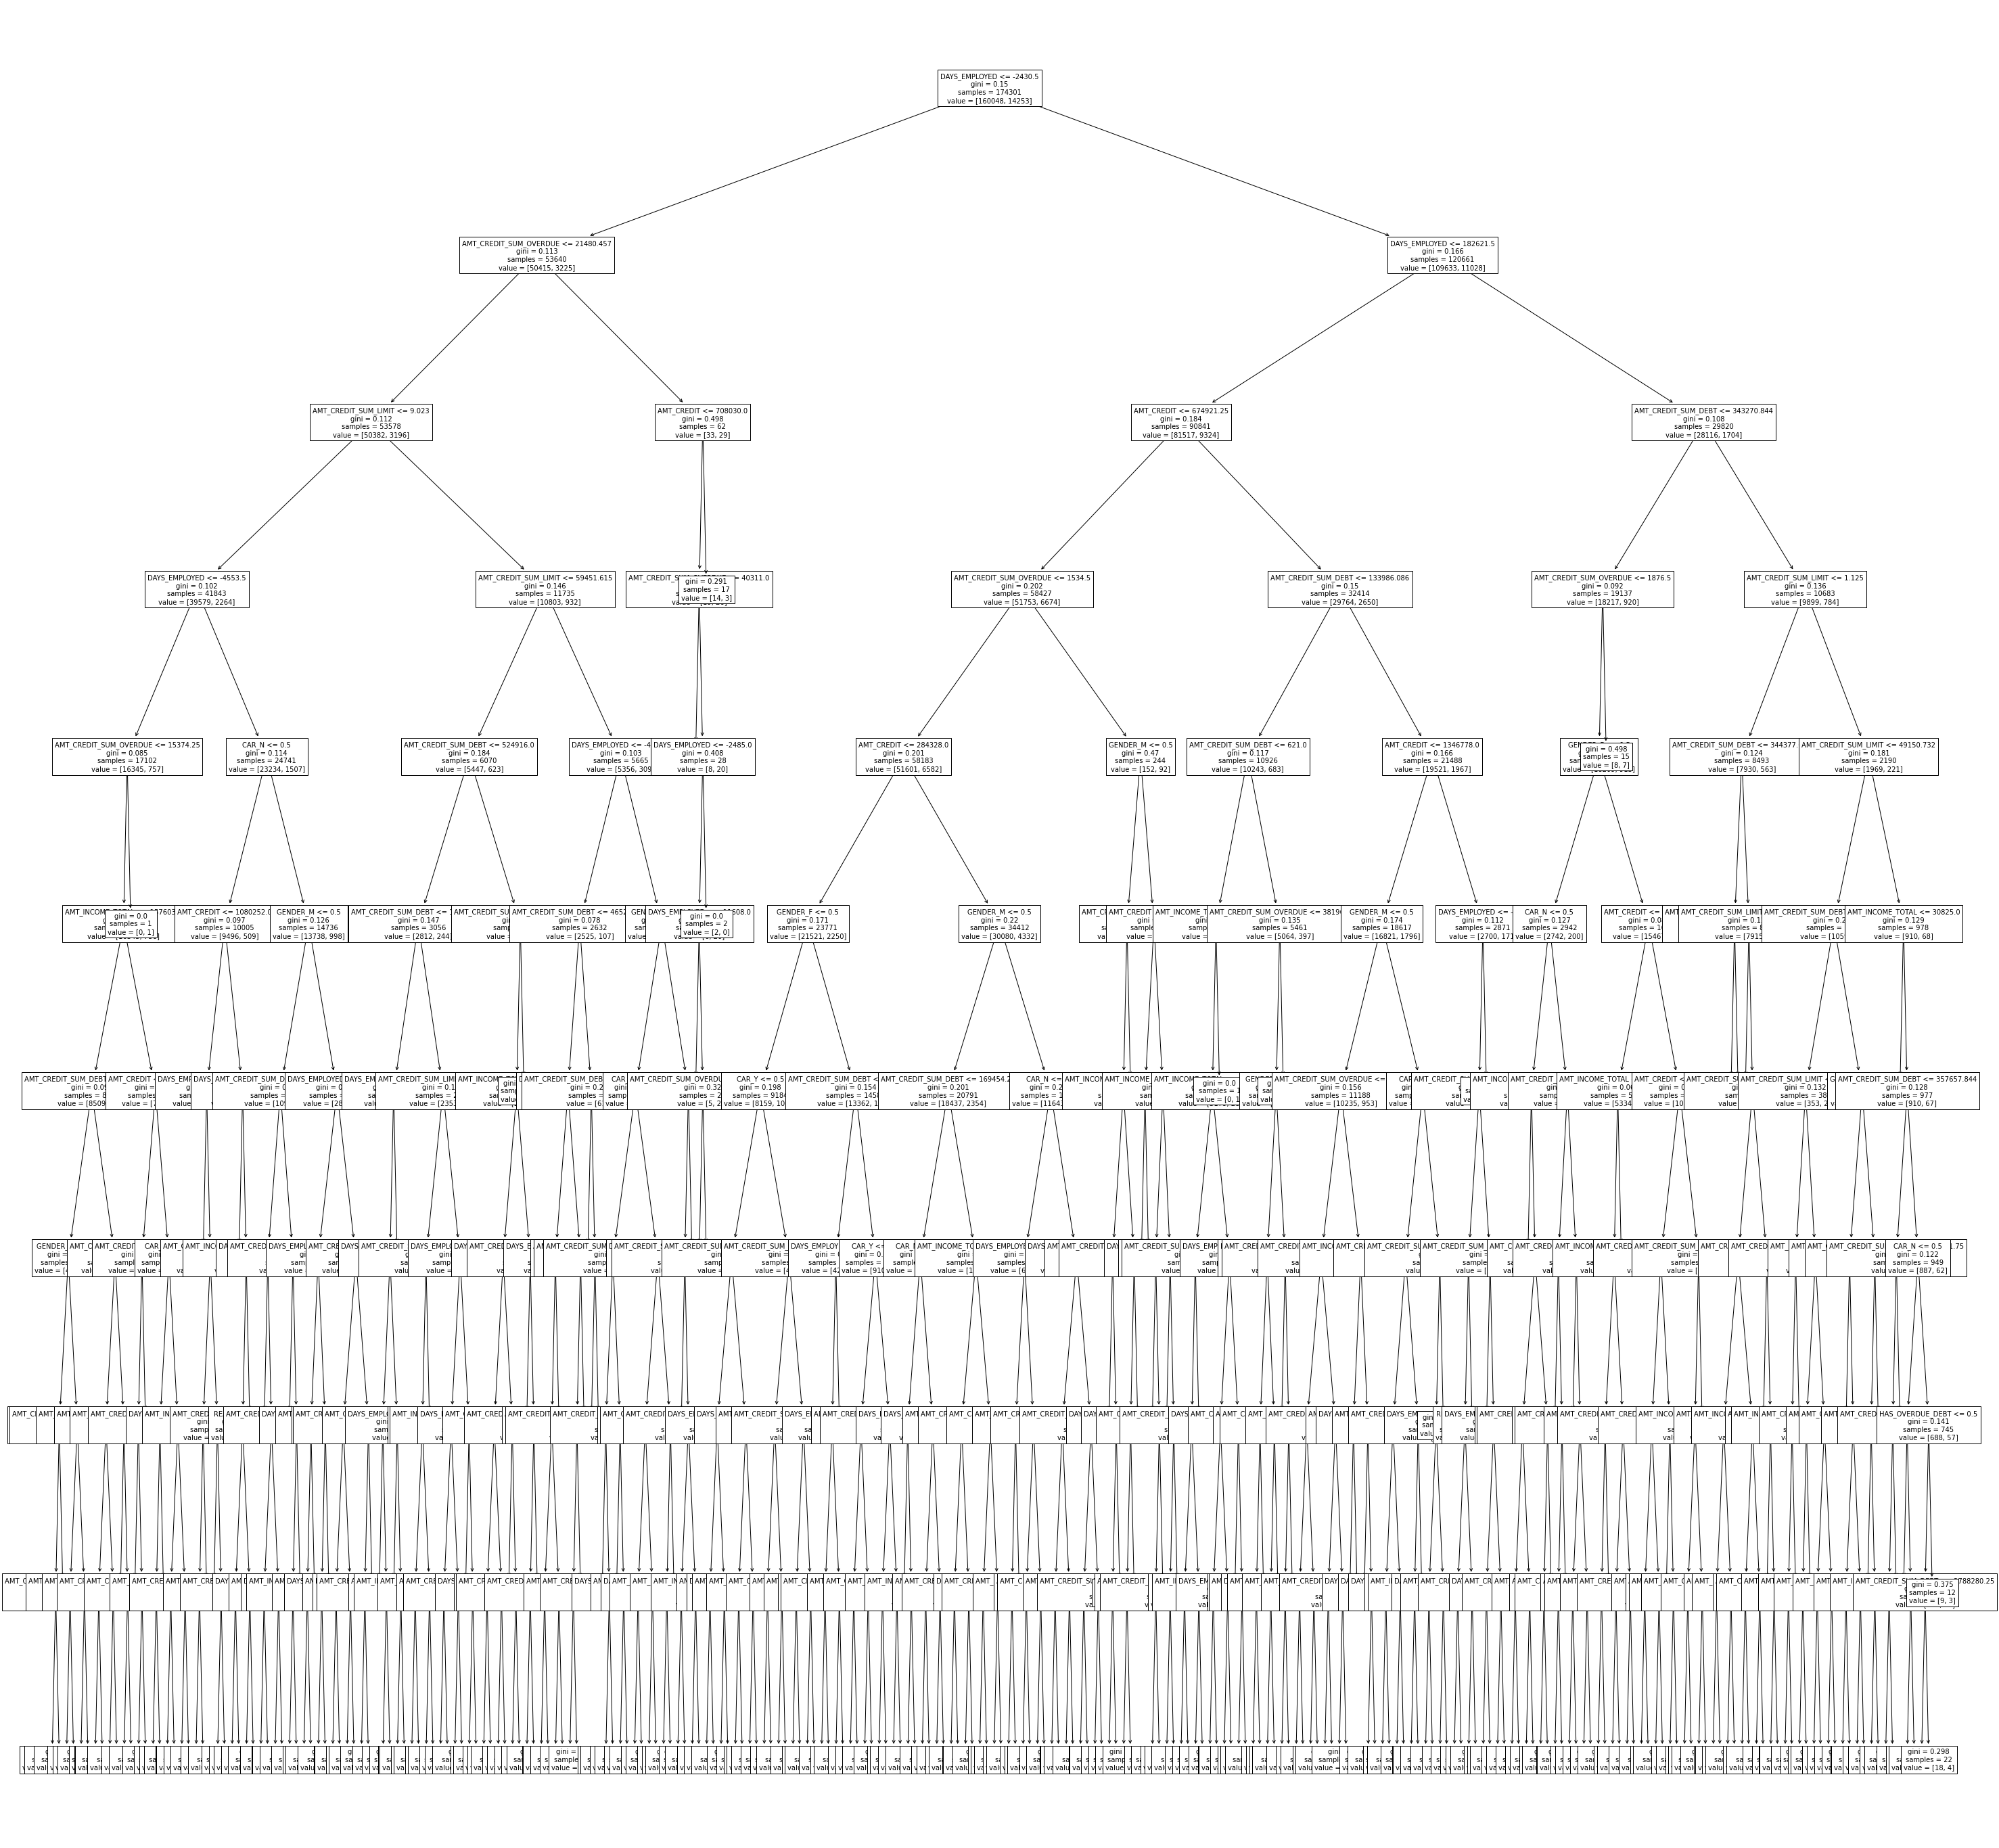

<Figure size 432x288 with 0 Axes>

In [49]:
#show and save a visualization of the decision tree
plt.figure(figsize=(50,50))
tree.plot_tree(dtr, feature_names=fn, fontsize=10)
plt.show()
plt.savefig('results/toptentree.png', format='png')

## Part 2: Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [51]:
#separate features and target
X2 = df_train_e[df_train_e.columns.difference(['SK_ID_CURR','TARGET'])]
y2 = df_train_e["TARGET"]


fn = df_train_e.columns.difference(['SK_ID_CURR','TARGET'])
fn

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'AMT_GOODS_PRICE',
       'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON',
       ...
       'WEEKDAY_APPR_PROCESS_START_SUNDAY',
       'WEEKDAY_APPR_PROCESS_START_THURSDAY',
       'WEEKDAY_APPR_PROCESS_START_TUESDAY',
       'WEEKDAY_APPR_PROCESS_START_WEDNESDAY', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
      dtype='object', length=247)

In [52]:
X2.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,...,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
0,24700.5,406597.5,245781.0,31988.565,0.0,351000.0,202500.0,0.0,0.0,0.0,...,0,0,0,1,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341
1,35698.5,1293502.5,0.0,810000.000,0.0,1129500.0,270000.0,0.0,0.0,0.0,...,0,0,0,0,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040
2,27517.5,490495.5,240057.0,0.000,0.0,454500.0,99000.0,0.0,0.0,0.0,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
3,41301.0,1560726.0,1077349.5,0.000,0.0,1395000.0,171000.0,0.0,0.0,1.0,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,42075.0,1530000.0,348007.5,0.000,0.0,1530000.0,360000.0,0.0,0.0,0.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
#fill all Nulls with 0
X2 = X2.fillna(0)
X2.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,...,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
0,24700.5,406597.5,245781.0,31988.565,0.0,351000.0,202500.0,0.0,0.0,0.0,...,0,0,0,1,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341
1,35698.5,1293502.5,0.0,810000.000,0.0,1129500.0,270000.0,0.0,0.0,0.0,...,0,0,0,0,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040
2,27517.5,490495.5,240057.0,0.000,0.0,454500.0,99000.0,0.0,0.0,0.0,...,0,0,0,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,41301.0,1560726.0,1077349.5,0.000,0.0,1395000.0,171000.0,0.0,0.0,1.0,...,1,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,42075.0,1530000.0,348007.5,0.000,0.0,1530000.0,360000.0,0.0,0.0,0.0,...,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [54]:
#split data into training and testing sets
X_rfc1_train, X_rfc1_test, y_rfc1_train, y_rfc1_test = train_test_split(X2, y2, test_size=0.2)
#check shape
print(X_rfc1_train.shape)
print(X_rfc1_test.shape)
print(y_rfc1_train.shape)
print(y_rfc1_test.shape)

(174301, 247)
(43576, 247)
(174301,)
(43576,)


In [55]:
#build random forest classifier, test on the testing data, and get accuracy
rfc1 = RandomForestClassifier(max_depth=15,min_samples_split=20)
rfc1.fit(X_rfc1_train, y_rfc1_train)
rfc1_predict=rfc1.predict(X_rfc1_test)
print(rfc1_predict)
rfc1.score(X_rfc1_test, y_rfc1_test)

[0 0 0 ... 0 0 0]


0.9182348081512759

In [56]:
#show counts per prediction
unique, counts = np.unique(rfc1_predict, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 43576]]


In [57]:
#calculate AUC
rfc1_pred_prob = rfc1.predict_proba(X_rfc1_test)[:,1]
rfc1_auc = roc_auc_score(y_rfc1_test, rfc1_pred_prob)
print(rfc1_auc)

0.7392445476550461


In [58]:
cm = confusion_matrix(y_rfc1_test, rfc1_predict)
print(cm)

[[40013     0]
 [ 3563     0]]


In [59]:
#check predictability scores of the seelcted features
feature_scores = pd.Series(rfc1.feature_importances_, index=X_rfc1_train.columns).sort_values(ascending=False)

feature_scores

EXT_SOURCE_3                    0.099838
EXT_SOURCE_2                    0.099549
EXT_SOURCE_1                    0.029994
DAYS_BIRTH                      0.029813
DAYS_EMPLOYED                   0.027368
                                  ...   
FLAG_DOCUMENT_4                 0.000000
NAME_INCOME_TYPE_Student        0.000000
NAME_INCOME_TYPE_Businessman    0.000000
FLAG_MOBIL                      0.000000
NAME_INCOME_TYPE_Unemployed     0.000000
Length: 247, dtype: float64

In [60]:
#show top ten features
toptenfts = feature_scores.nlargest(10)
toptenfts

EXT_SOURCE_3              0.099838
EXT_SOURCE_2              0.099549
EXT_SOURCE_1              0.029994
DAYS_BIRTH                0.029813
DAYS_EMPLOYED             0.027368
DAYS_ID_PUBLISH           0.026073
AMT_CREDIT_SUM_DEBT       0.022301
DAYS_REGISTRATION         0.021809
DAYS_LAST_PHONE_CHANGE    0.021036
AMT_CREDIT                0.019306
dtype: float64

Based on the random forest*, the top 10 features to detemrine default risk are:
‘EXT_SOURCE_3’, ‘EXT_SOURCE_2’, ‘EXT_SOURCE_1’, ‘DAYS_BIRTH’, ‘NAME_EDUCATION_TYPE_Higher education’, ‘DAYS_EMPLOYED’, ‘AMT_CREDIT_SUM_OVERDUE’, ‘NAME_EDUCATION_TYPE_Secondary / secondary special’, ‘DAYS_ID_PUBLISH’, ‘AMT_GOODS_PRICE’

*note that in subsequent runs, these may not match the above identified features due to the randomness of the train/test data splits and the model itself.

## Part 3: Classification Tree with top Random Forest Features
### 3.1 Rebuild Single Classification Tree on New Top 10

In [61]:
#separate features from target
X3 = df_train_e[['SK_ID_CURR','EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'NAME_EDUCATION_TYPE_Higher education','DAYS_EMPLOYED', 'AMT_CREDIT_SUM_OVERDUE','NAME_EDUCATION_TYPE_Secondary / secondary special','DAYS_ID_PUBLISH','AMT_GOODS_PRICE']]
y3 = df_train_e["TARGET"]

Index(['SK_ID_CURR', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1',
       'DAYS_BIRTH', 'NAME_EDUCATION_TYPE_Higher education', 'DAYS_EMPLOYED',
       'AMT_CREDIT_SUM_OVERDUE',
       'NAME_EDUCATION_TYPE_Secondary / secondary special', 'DAYS_ID_PUBLISH',
       'AMT_GOODS_PRICE'],
      dtype='object')

In [62]:
X3.head()

,SK_ID_CURR,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,NAME_EDUCATION_TYPE_Higher education,DAYS_EMPLOYED,AMT_CREDIT_SUM_OVERDUE,NAME_EDUCATION_TYPE_Secondary / secondary special,DAYS_ID_PUBLISH,AMT_GOODS_PRICE
0,100002,0.139376,0.262949,0.083037,-9461,0,-637,0.0,1,-2120,351000.0
1,100003,NaN,0.622246,0.311267,-16765,1,-1188,0.0,0,-291,1129500.0
2,100008,0.621226,0.354225,NaN,-16941,0,-1588,0.0,1,-477,454500.0
3,100009,0.492060,0.724000,0.774761,-13778,1,-3130,0.0,0,-619,1395000.0
4,100010,0.540654,0.714279,NaN,-18850,1,-449,0.0,0,-2379,1530000.0


In [63]:
#fill all Nulls with 0
X3 = X3.fillna(0)
X3.head()

,SK_ID_CURR,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,NAME_EDUCATION_TYPE_Higher education,DAYS_EMPLOYED,AMT_CREDIT_SUM_OVERDUE,NAME_EDUCATION_TYPE_Secondary / secondary special,DAYS_ID_PUBLISH,AMT_GOODS_PRICE
0,100002,0.139376,0.262949,0.083037,-9461,0,-637,0.0,1,-2120,351000.0
1,100003,0.000000,0.622246,0.311267,-16765,1,-1188,0.0,0,-291,1129500.0
2,100008,0.621226,0.354225,0.000000,-16941,0,-1588,0.0,1,-477,454500.0
3,100009,0.492060,0.724000,0.774761,-13778,1,-3130,0.0,0,-619,1395000.0
4,100010,0.540654,0.714279,0.000000,-18850,1,-449,0.0,0,-2379,1530000.0


In [64]:
#split data into training and testing sets
X3_train_ID, X3_test_ID, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2)
#verify shapes
print(X3_train_ID.shape)
print(X3_test_ID.shape)
print(y3_train.shape)
print(y3_test.shape)

(174301, 11)
(43576, 11)
(174301,)
(43576,)


In [65]:
X3_train=X3_train_ID.drop(columns=['SK_ID_CURR'])
X3_test=X3_test_ID.drop(columns=['SK_ID_CURR'])
X3_train.head()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,NAME_EDUCATION_TYPE_Higher education,DAYS_EMPLOYED,AMT_CREDIT_SUM_OVERDUE,NAME_EDUCATION_TYPE_Secondary / secondary special,DAYS_ID_PUBLISH,AMT_GOODS_PRICE
194951,0.000000,0.164343,0.000000,-16301,0,-3885,0.0,1,-8,675000.0
25220,0.607557,0.649531,0.000000,-13739,0,-1141,0.0,1,-4116,405000.0
140342,0.616122,0.781955,0.833362,-17683,1,-1302,0.0,0,-1244,945000.0
109147,0.245851,0.742338,0.000000,-12968,1,-770,0.0,0,-3095,225000.0
199157,0.520898,0.218264,0.623803,-11612,1,-2326,0.0,0,-1417,1062000.0


In [66]:
X3_test.head()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,NAME_EDUCATION_TYPE_Higher education,DAYS_EMPLOYED,AMT_CREDIT_SUM_OVERDUE,NAME_EDUCATION_TYPE_Secondary / secondary special,DAYS_ID_PUBLISH,AMT_GOODS_PRICE
162292,0.766234,0.304002,0.000000,-14371,0,-3696,0.0,1,-4688,225000.0
24073,0.237916,0.413471,0.807884,-23599,0,-14414,0.0,1,-4619,1125000.0
17858,0.000000,0.667831,0.000000,-19475,0,-2039,0.0,1,-3013,945000.0
210299,0.770087,0.485382,0.000000,-13464,0,-3875,0.0,1,-4906,1197000.0
217041,0.363945,0.622898,0.400849,-17634,0,-4555,0.0,1,-1151,1125000.0


In [84]:
print(X3_train.shape)
print(X3_test.shape)
print(y3_train.shape)
print(y3_test.shape)

(174301, 10)
(43576, 10)
(174301,)
(43576,)


In [88]:
fn = X3_train.columns
fn

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH',
       'NAME_EDUCATION_TYPE_Higher education', 'DAYS_EMPLOYED',
       'AMT_CREDIT_SUM_OVERDUE',
       'NAME_EDUCATION_TYPE_Secondary / secondary special', 'DAYS_ID_PUBLISH',
       'AMT_GOODS_PRICE'],
      dtype='object')

In [85]:
dtr2 = DecisionTreeClassifier(max_depth=10,min_samples_split=20)
dtr2.fit(X3_train, y3_train)
dtr2_predict=dtr2.predict(X3_test)
print(dtr2_predict)
dtr2.score(X3_test, y3_test)

[0 0 0 ... 0 0 0]


0.9168349550211126

In [86]:
unique, counts = np.unique(dtr2_predict, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 43304]
 [    1   272]]


In [87]:
#calculate AUC
dtr2_pred_prob = dtr2.predict_proba(X3_test)[:,1]
dtr2_auc = roc_auc_score(y3_test, dtr2_pred_prob)
print(dtr2_auc)

0.7121031547322398


In [70]:
cm = confusion_matrix(y3_test, dtr2_predict)
print(cm)

[[39861   181]
 [ 3443    91]]


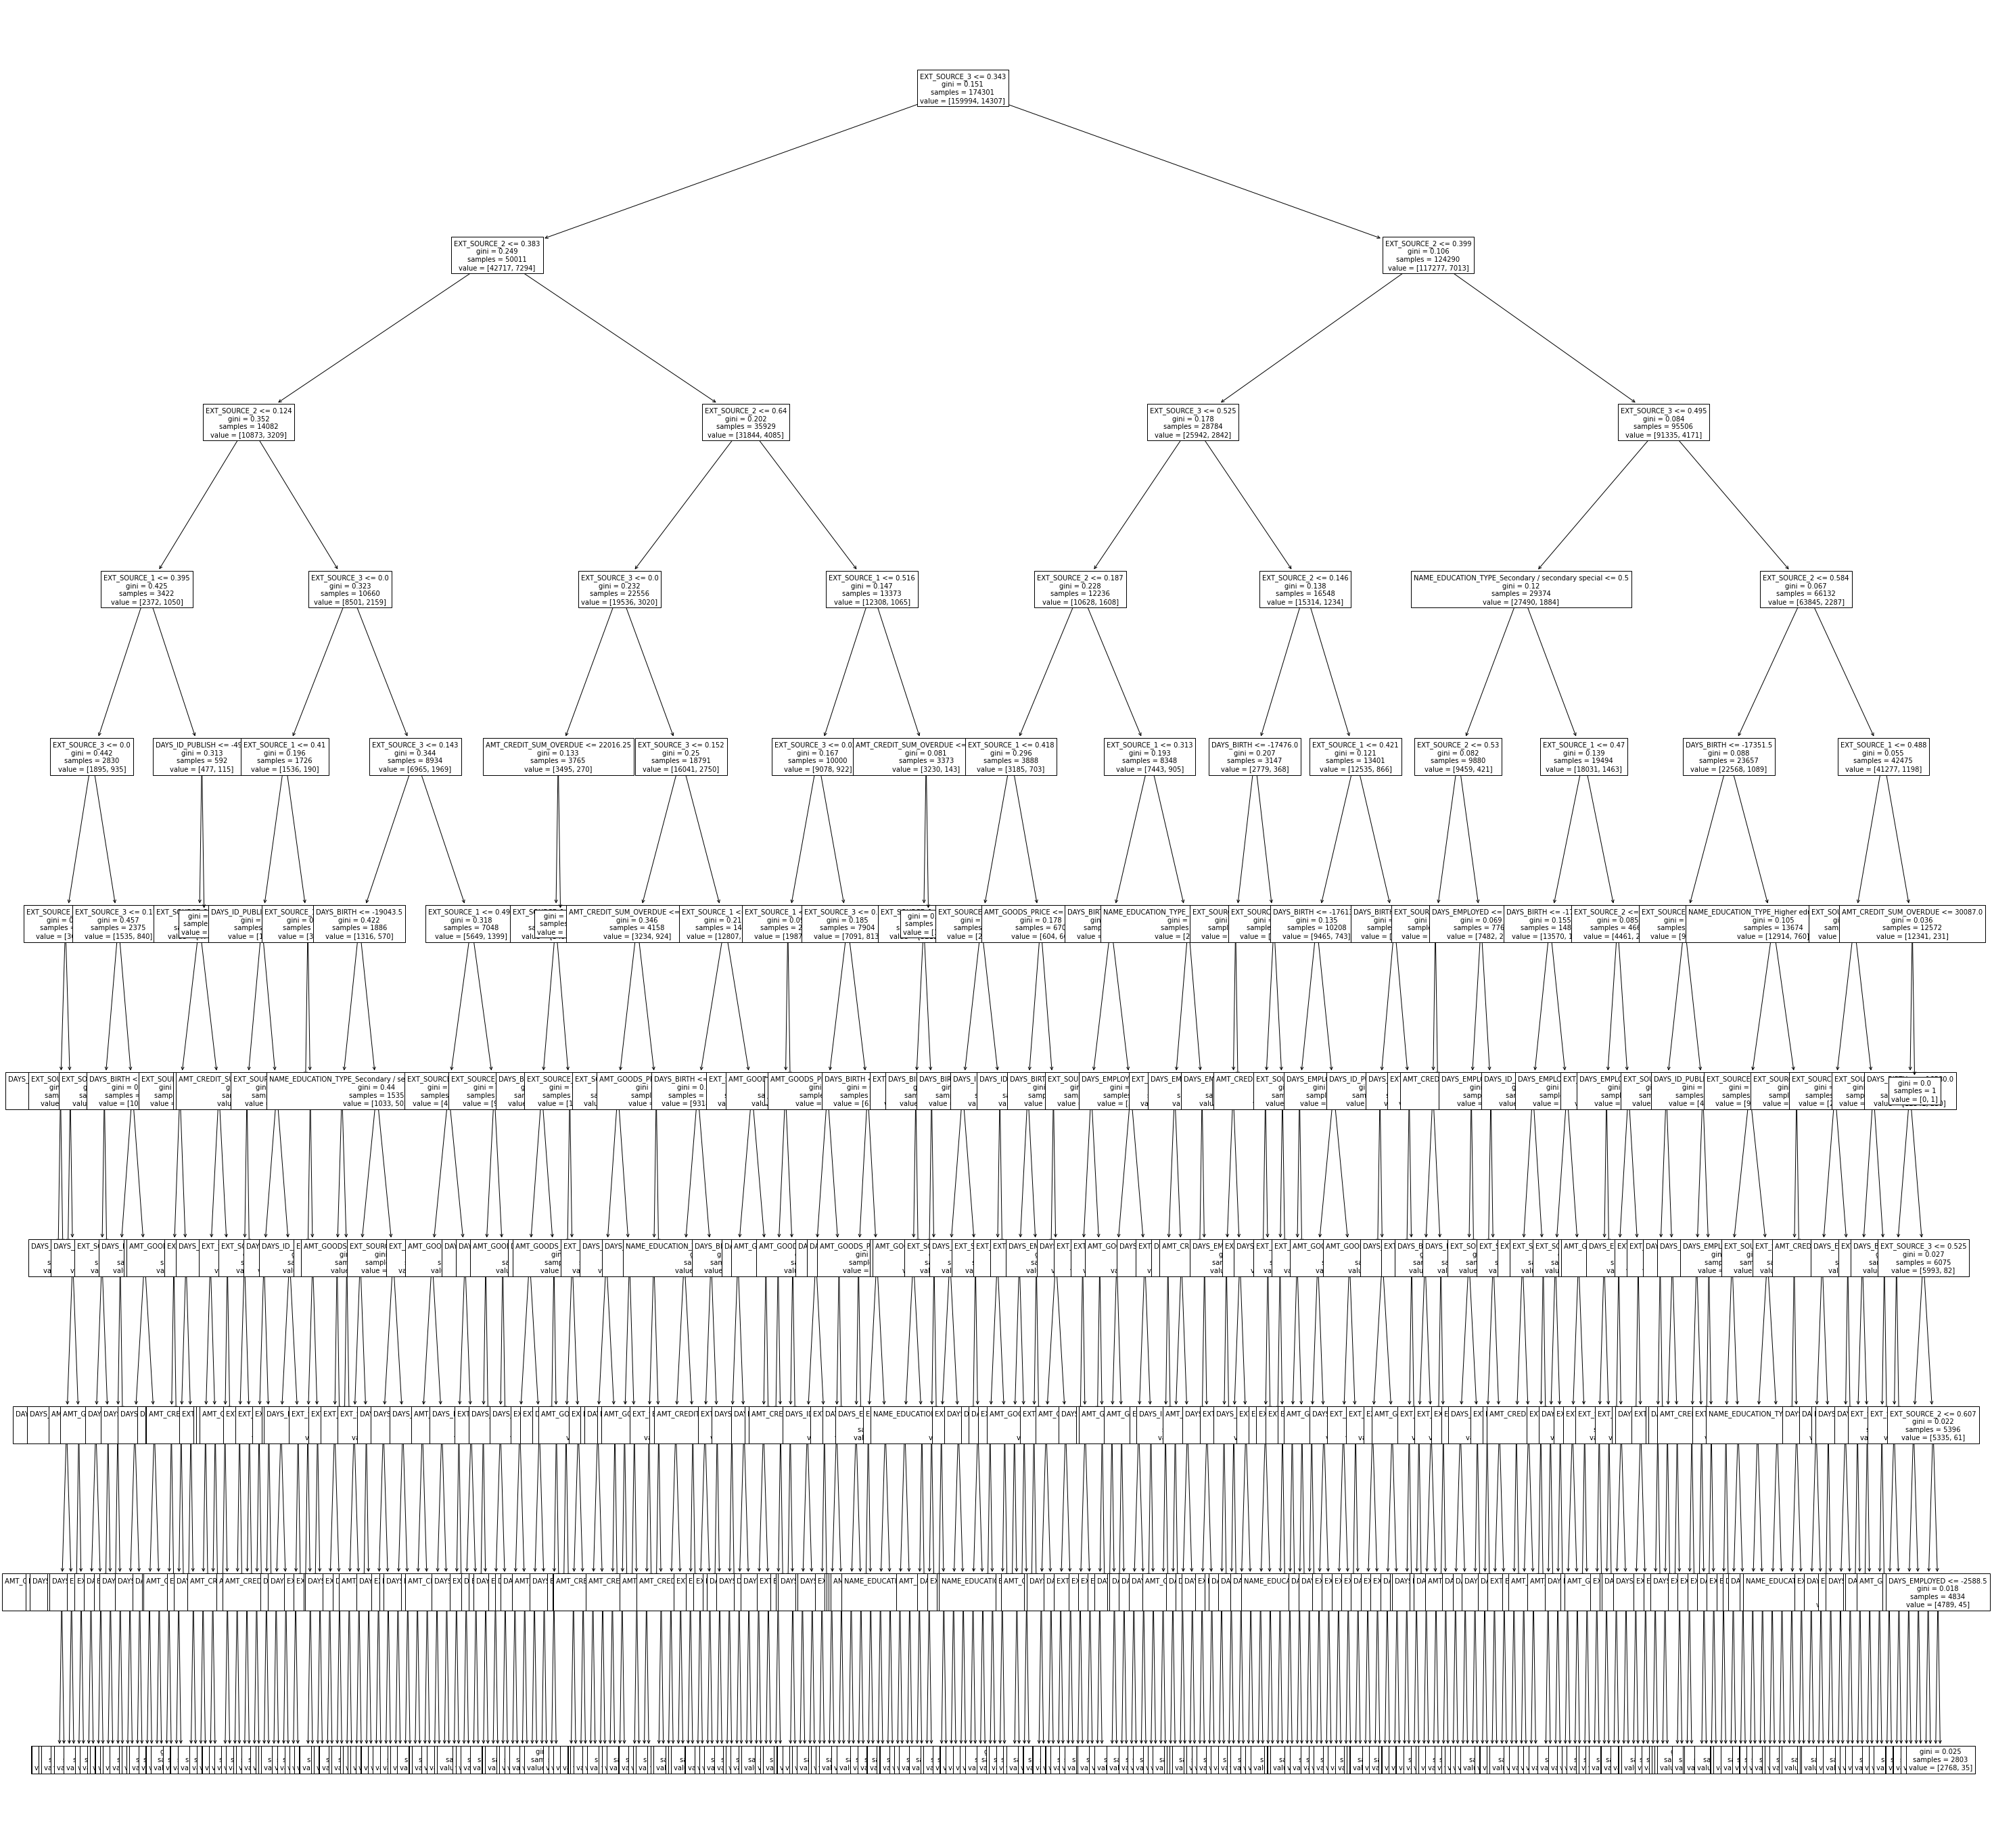

<Figure size 432x288 with 0 Axes>

In [89]:
#print & save decision tree graphic
plt.figure(figsize=(50,50))
tree.plot_tree(dtr2, feature_names=fn, fontsize=10)
plt.show()
plt.savefig('results/newtoptentree.png', format='png')

## Part 4: Rebuild Random Forest on Only the Top 10 Features

In [72]:
#built random forest classifier, test on the testing data, and get accuracy
rfc2 = RandomForestClassifier(max_depth=10,min_samples_split=20)
rfc2.fit(X3_train, y3_train)
rfc2_predict=rfc2.predict(X3_test)
print(rfc2_predict)
rfc2.score(X3_test, y3_test)

[0 0 0 ... 0 0 0]


0.9190150541582522

In [73]:
#print out predictions?
print(set(rfc2_predict))
unique, counts = np.unique(rfc2_predict, return_counts=True)
print(np.asarray((unique, counts)).T)

{0, 1}
[[    0 43565]
 [    1    11]]


In [74]:
#calculate AUC
rfc2_pred_prob = rfc2.predict_proba(X3_test)[:,1]
rfc2_auc = roc_auc_score(y3_test, rfc2_pred_prob)
print(rfc2_auc)

0.745526096862584


In [75]:
cm = confusion_matrix(y3_test, rfc2_predict)
print(cm)

[[40039     3]
 [ 3526     8]]


## Part 5: Comparing the Accuracy & Selecting the Model
Below are the accuracy scores and area under the curve (AUC) of each tree/forest iteration during my final runs for each of them. Note that these may vary slightly per run, based on the randomness of some of the functions.

| | **Top 10 Single Tree** | **Random Forest** | **New Top 10 Single Tree** | **New Random Forest** 
:-|:-:|-:|-:|-:
**Accuracy**|91.81%|91.78%|91.87%|91.87%
**TN / FP**|40014 / 67|40002 / 0|39810 / 158|39962 / 6
**FN / TP**|3479 / 16|3573 / 1|3543 / 65|3599 / 9
**AUC**|.71|.75|.72|.74

All trees ran with about 92% accuracy, with little variation between all of them. The accuracy did go up slightly from my guessed top 10 and the actual top 10 features (as identified by the random forest). I would expect this, since the random forest can more programmatically determine the top ten variables. The AUC for each model is also quite close, with all falling between .7 and .75. However, when breaking these results down into true negatives, false positions, false negatives, and true positives (TN, FP, FN, and TP respectively), it's clear that most of the models struggled to positively identify any customers at risk of default.

I would still be wary of using this algorithm to flag possible default risk/lending decisions. As seen in the variables selected, there is a chance that the algorithms are all perpetuating age or gender bias that's present in the data.

Given the four confusion matrices, I will proceed with utilizing the true top 10 single tree. However, I want to stress that this data should not be used to make lending decisions without a human underwriter confirming the findings. 

## Part 6: Export List of Default Risk Customers

In [76]:
X3_test_ID.head()

,SK_ID_CURR,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,NAME_EDUCATION_TYPE_Higher education,DAYS_EMPLOYED,AMT_CREDIT_SUM_OVERDUE,NAME_EDUCATION_TYPE_Secondary / secondary special,DAYS_ID_PUBLISH,AMT_GOODS_PRICE
162292,365394,0.766234,0.304002,0.000000,-14371,0,-3696,0.0,1,-4688,225000.0
24073,139489,0.237916,0.413471,0.807884,-23599,0,-14414,0.0,1,-4619,1125000.0
17858,129396,0.000000,0.667831,0.000000,-19475,0,-2039,0.0,1,-3013,945000.0
210299,443926,0.770087,0.485382,0.000000,-13464,0,-3875,0.0,1,-4906,1197000.0
217041,454896,0.363945,0.622898,0.400849,-17634,0,-4555,0.0,1,-1151,1125000.0


In [77]:
print(f"Customer data shape: {X3_test.shape}. Predictions data shape: {rfc2_predict.shape}")

Customer data shape: (43576, 10). Predictions data shape: (43576,)


In [78]:
results = X3_test_ID.copy()

In [79]:
results['IS_DEFAULT_RISK'] = dtr2_predict
results.head()

,SK_ID_CURR,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,NAME_EDUCATION_TYPE_Higher education,DAYS_EMPLOYED,AMT_CREDIT_SUM_OVERDUE,NAME_EDUCATION_TYPE_Secondary / secondary special,DAYS_ID_PUBLISH,AMT_GOODS_PRICE,IS_DEFAULT_RISK
162292,365394,0.766234,0.304002,0.000000,-14371,0,-3696,0.0,1,-4688,225000.0,0
24073,139489,0.237916,0.413471,0.807884,-23599,0,-14414,0.0,1,-4619,1125000.0,0
17858,129396,0.000000,0.667831,0.000000,-19475,0,-2039,0.0,1,-3013,945000.0,0
210299,443926,0.770087,0.485382,0.000000,-13464,0,-3875,0.0,1,-4906,1197000.0,0
217041,454896,0.363945,0.622898,0.400849,-17634,0,-4555,0.0,1,-1151,1125000.0,0


In [80]:
results = results.drop(results.columns.difference(['SK_ID_CURR','IS_DEFAULT_RISK']),axis=1)
results.head()

,SK_ID_CURR,IS_DEFAULT_RISK
162292,365394,0
24073,139489,0
17858,129396,0
210299,443926,0
217041,454896,0


In [81]:
#drop all 0's, leaving only the ID's for default risk borrowers
results = results[results['IS_DEFAULT_RISK']!=0]
results.head()

,SK_ID_CURR,IS_DEFAULT_RISK
140567,330103,1
166231,371949,1
109552,279169,1
123355,301786,1
37938,162108,1


In [82]:
results.to_csv('results/default_risk_results.csv', index=False)